In [15]:
import requests
from urllib.parse import quote
import pandas as pd
import folium

- API Key 가져오기

In [16]:
with open('data/kakaoapikey.txt') as f:
    kakao_key = f.read()

- URL 만들기

In [17]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = '경기도 수원시 영통구 월드컵로 199 (원천동)'
url = f'{base_url}?query={quote(addr)}'
url


'https://dapi.kakao.com/v2/local/search/address.json?query=%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EC%88%98%EC%9B%90%EC%8B%9C%20%EC%98%81%ED%86%B5%EA%B5%AC%20%EC%9B%94%EB%93%9C%EC%BB%B5%EB%A1%9C%20199%20%28%EC%9B%90%EC%B2%9C%EB%8F%99%29'

In [18]:
#Header: "Authorization: KakaoAK ${REST_API_KEY}"
header = {'Authorization': f'KakaoAK {kakao_key}'}


In [19]:
result = requests.get(url, headers= header).json()
result

{'documents': [{'address': {'address_name': '경기 수원시 영통구 원천동 13-4',
    'b_code': '4111710200',
    'h_code': '4111755000',
    'main_address_no': '13',
    'mountain_yn': 'N',
    'region_1depth_name': '경기',
    'region_2depth_name': '수원시 영통구',
    'region_3depth_h_name': '원천동',
    'region_3depth_name': '원천동',
    'sub_address_no': '4',
    'x': '127.044142224462',
    'y': '37.279204703544'},
   'address_name': '경기 수원시 영통구 월드컵로 199',
   'address_type': 'ROAD_ADDR',
   'road_address': {'address_name': '경기 수원시 영통구 월드컵로 199',
    'building_name': '아주대학교어학교육원',
    'main_building_no': '199',
    'region_1depth_name': '경기',
    'region_2depth_name': '수원시 영통구',
    'region_3depth_name': '원천동',
    'road_name': '월드컵로',
    'sub_building_no': '',
    'underground_yn': 'N',
    'x': '127.044142224462',
    'y': '37.279204703544',
    'zone_no': '16502'},
   'x': '127.044142224462',
   'y': '37.279204703544'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [20]:
result.keys()

dict_keys(['documents', 'meta'])

In [21]:
result['documents'][0].keys()

dict_keys(['address', 'address_name', 'address_type', 'road_address', 'x', 'y'])

In [22]:
lat = float(result['documents'][0]['y'])
lng = float(result['documents'][0]['x'])
lat, lng

(37.279204703544, 127.044142224462)

In [23]:
df = pd.read_csv('data/수원소재대학교.csv')
df

,이름,주소
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동)
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동)
2,용인 경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동)
3,수원 여자대학,경기도 수원시 권선구 온정로 72 (오목천동)
4,수원 대학교,경기도 화성시 봉담읍 와우안길 17
5,수원 과학대학교,경기도 수원시 권선구 서호로 89 (서둔동)
6,수원 경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동)
7,수원 성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동)


In [24]:
lat_list, lng_list = [], []
for i in df.index:
    url = f'{base_url}?query={quote(df.주소[i])}'
    result = requests.get(url, headers= header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [25]:
df['위도'] = lat_list
df['경도'] = lng_list
df

,이름,주소,위도,경도
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000
2,용인 경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199
3,수원 여자대학,경기도 수원시 권선구 온정로 72 (오목천동),37.252705,126.963307
4,수원 대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480
5,수원 과학대학교,경기도 수원시 권선구 서호로 89 (서둔동),37.268145,126.987073
6,수원 경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117
7,수원 성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209


In [26]:
df.to_csv('data/수원소재대학교2.csv',index=False)
pd.read_csv('data/수원소재대학교2.csv')

,이름,주소,위도,경도
0,아주대학교,경기도 수원시 영통구 월드컵로 199 (원천동),37.279205,127.044142
1,동남보건대학,경기도 수원시 장안구 천천로74번길 50 (정자동),37.296938,126.987000
2,용인 경희대학교,경기도 용인시 기흥구 덕영대로 1732 (서천동),37.239800,127.081199
3,수원 여자대학,경기도 수원시 권선구 온정로 72 (오목천동),37.252705,126.963307
4,수원 대학교,경기도 화성시 봉담읍 와우안길 17,37.210117,126.979480
5,수원 과학대학교,경기도 수원시 권선구 서호로 89 (서둔동),37.268145,126.987073
6,수원 경기대학교,경기도 수원시 영통구 광교산로 154-42 (이의동),37.298014,127.033117
7,수원 성균관대학교,경기도 수원시 장안구 서부로 2066 (천천동),37.295976,126.974209



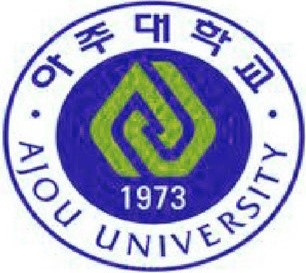
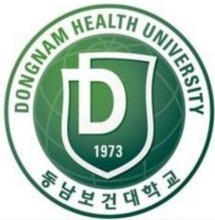
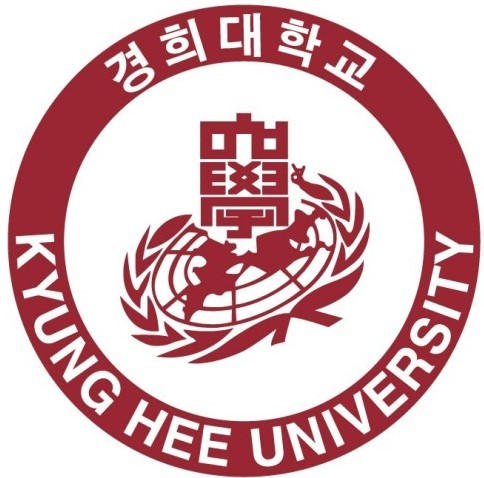
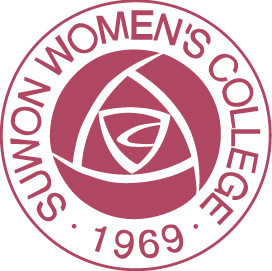
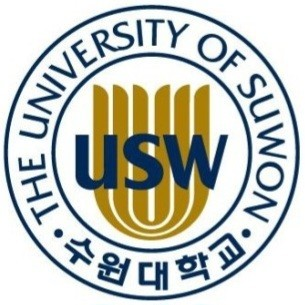
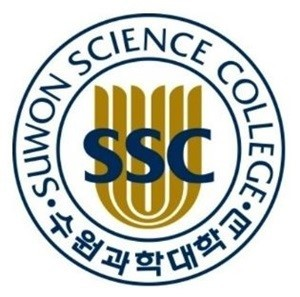
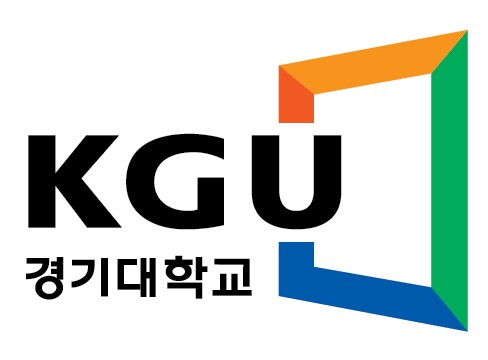
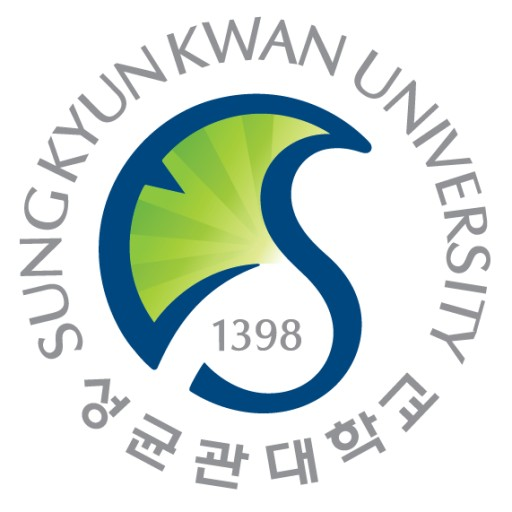

In [44]:
df2 = pd.read_csv('data/수원소재대학교2.csv')
df2['color'] = ['yellow','violet','blue','orange','black','green','purple','gray']
univ = folium.Map(location=[df2.위도.mean(),df2.경도.mean()], zoom_start=11)
for i in df2.index:
    folium.Marker(
        location=[df2.위도[i],df2.경도[i]],
        popup=folium.Popup(df2.주소[i], max_width=200),
        tooltip= df2.이름[i],
        color=df2.color[i],
        icon= folium.CustomIcon(f'data/logo/{i}.jpg', icon_size=(30,30))
    ).add_to(univ)
title_html = '<h4 align="center" style = "font-size:15px">수원 소재 대학교</h4>'
univ.get_root().html.add_child(folium.Element(title_html))
univ
